# Exploratory Data Analysis
### Elements of structured data
- data comes from many sources.
- there are two basic types of structured data; **numeric and categorical**. 
- **numeri**c data comes in two forms: **continuous and discrete.**
- **categorical** takes only fixed set of values such as TV screen
- **binary data** is important special case of categorical data that takes only one of two values such as 0/1, yes/no or true/ false.
- categorical types is **ordinal data **: in which categories are ordered as numerical rating(1,2,3,4,5) stars.
- why data type **important**: To help determine the type of visual display, data analysis or statistical model and improve computational performance

### Key Ideas
- data is typically classified in software by type.
- data type include numeric (continuous, discrete) and categorical (binary, ordinal).
- data typing in software acts as a signal to the software on how to process the data.

### Rectangular data
- Typical frame of reference for analysis in data science is  rectangular data object, like spreadsheet or database table
- rectangular data is general term for  two-dimensional matrix with rows indicating records(cases) and columns indicating features(variables)
- columns names is data-science : column, attribute, input, predictor, variable, Field, Dimension, Independent variable, Key.
- rows names is data-science : row, record, case, example, instance, observation, pattern, sample, Tuple, Data Point, Entry.

### Nonrectangular data structures
- Time series data
- Spatial data (mapping and location)

### Estimates of location
- **estimate** of where most of the data is located i.e its central tendency.
- **Mean(average):** sum of all values divided by number of values.
- **Weighted mean**
- **Median :** One half of data lies above and below as 50th percentile.
- **Percentile:** value such that P percent of data lies below as quantile.
- **Trimmed mean:** average of all values after dropping fixed number of extreme values. as truncated mean.
- **Robust:** Not sensitive to extreme values. as resistant.
- **Outlier:** data value that is very different from most of data as extreme value

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import statsmodels.robust as robust
from statsmodels.robust.scale import mad


In [2]:

state = pd.read_csv("E:\Statistics-for-Data-Science\population_murder_rate.csv")
state

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Kamran\AppData\Local\Temp\ipykernel_13532\1139261898.py:1: SyntaxWarning: invalid escape sequence '\S'
  state = pd.read_csv("E:\Statistics-for-Data-Science\population_murder_rate.csv")


,Sr.,State,Population,Murder rate,Abbreviation
0,1,Alabama,4779736,5.7,AL
1,2,Alaska,710231,5.6,AK
2,3,Arizona,6392017,4.7,AZ
3,4,Arkansas,2915918,5.6,AR
4,5,California,37253956,4.4,CA
5,6,Colorado,5029196,2.8,co
6,7,Connecticut,3574097,2.4,CT
7,8,Delaware,897934,5.8,DE


In [3]:
print(state['Population'].mean())
print(trim_mean(state['Population'], 0.1))
print(state['Population'].median())

7694135.625
7694135.625
4176916.5


In [4]:
# weighted mean and weighted median

weight_mean = np.average(state['Murder rate'], weights=state['Population'])  
print(weight_mean)
import wquantiles 
weight_median = wquantiles.median(state['Murder rate'], weights=state['Population'])
print(weight_median)
print("In this case, weighted mean and weighted median ae about same.")

4.376359279149048
4.448750497554494
In this case, weighted mean and weighted median ae about same.


### Key ideas
- Basic metric for location is mean, but it can be sensitive to extreme values(outlier).
- other metrics (median, trimmed_mean) are less sensitive to outliers and unusual distributions and hence are more robust.

### Estimate of variability
- location is just one dimension in summarizing a feature.
- second  dimension, variability, also refered to as dispersion, measure whether data values are tightly clustered or spread out.
- At heart of statistics lies variability: measuring it, reducing it, distinguishing random from real variability.
- **Deviations:** difference between observed values and estimate of location ( errors, residuals)
- **variance:** sum of square deviation fro  mean divided by n-1 where n is number of data values( mean-squared-error).
- **standard deviation:** square root of the variance.
- **mean absolute deviation:** mean of absolute values of deviations from mean(l1-norm, manhattan norm).
- **median absolute deviation from the median:** the median of absolute values of deviations from median
- **Range:** difference between largest and smallest value in a data set.
-** order statistics: **metrics based on data values sorted from smallest to biggest(ranks).
- **percentile:** value such that P percent of values take on this value or less and (100 - P) percent take on this values or more(quantile).
- **Inter-quantile range:** difference between 75th percentile and 25th percentile(IQR).


### Degree of freedom
- if we use intuitive denominator of 'n' in the variance formula, you will underestimate true value of variance and standard deviation in population. this is referred to as a biased estimate.
- however, if we divide by 'n-1' instead of 'n', the variance becomes unbiased estimate
- For most problems, data scientists do not need worry about degree of freedom.
- the variance and standard deviation are especially sensitive to outliers since they are based on squared deviations.
- A robust estimate of variability is the median absolute deviation from the median or MAD.

In [5]:
# Simple example in sorted order
data1 = [2,3,5,3,1,6,7,9]  # firstly sorted data
data = [1,2,3,3,5,6,7,9]
print(f"mean of the data is: {np.mean(data)}")
print(f"median of the data is: {np.median(data)}")
print(f"25th percentile of the data is: {np.percentile(data, 25)}")
print(f"75th percentile of the data is: {np.percentile(data, 75)}")
print(f"Iqr is: {np.percentile(data, 75) - np.percentile(data, 25)}") # iqr = q3 - q1


mean of the data is: 4.5
median of the data is: 4.0
25th percentile of the data is: 2.75
75th percentile of the data is: 6.25
Iqr is: 3.5


### Example : variability estimates of state population

In [6]:
state

,Sr.,State,Population,Murder rate,Abbreviation
0,1,Alabama,4779736,5.7,AL
1,2,Alaska,710231,5.6,AK
2,3,Arizona,6392017,4.7,AZ
3,4,Arkansas,2915918,5.6,AR
4,5,California,37253956,4.4,CA
5,6,Colorado,5029196,2.8,co
6,7,Connecticut,3574097,2.4,CT
7,8,Delaware,897934,5.8,DE


- By pandas dataframe provides methods to calculating standard deviation and quantiles.we can easily determine IQR.
- For robust MAD, we use function `robust.scale.mad` from statsmodels package:

In [7]:
std1 = state['Population'].std()
print(f"Std: {std1}")
Iqr = state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
print(f"IQR : {Iqr}")
robust_mad = robust.scale.mad(state['Population'])
print(f"MAD : {robust_mad}")

Std: 12105745.29585633
IQR : 2958479.25
MAD : 2576836.044572552


### Key Ideas
- variance and standard deviation are most widespread and routinely reported statistics of variability.
- both are sensitive to outliers.
- More robust metrics include mean absolute deviation, median absolute deviation from the median, and percentile(quantiles)

### Exploratory The Data Distribution
- it is also useful to explore how the data is distributed overall.
- **Boxplot:** A plot introduced by Tukey as a quick  way to visualize the distribution of data (box and whiskers plot)
- **Frequency table:** A tall of count of numeric data values that fall into a set of intervals(bins)
- **Histogram:** A plot of the frequency table with bins on x-axis and count(or proportion) on y-axis
- **Density plot:** a smoothed version of histogram, often based on a kernel density estimate

In [8]:
# Percentiles and boxplot
perc = state['Murder rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
print(perc)


0.05    2.540
0.25    4.000
0.50    5.150
0.75    5.625
0.95    5.765
Name: Murder rate, dtype: float64


Text(0, 0.5, 'Population(millions)')

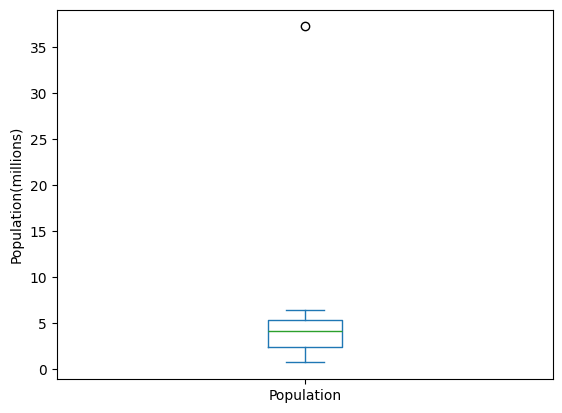

In [9]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population(millions)')

- The function pandas.cut creates a series that maps the values into segments and using method value_counts, we get frequency table.

In [10]:
binnedpopulation = pd.cut(state['Population'], 10)
binnedpopulation.value_counts()

Population
(673687.275, 4364603.5]     4
(4364603.5, 8018976.0]      3
(33599583.5, 37253956.0]    1
(8018976.0, 11673348.5]     0
(15327721.0, 18982093.5]    0
(11673348.5, 15327721.0]    0
(18982093.5, 22636466.0]    0
(22636466.0, 26290838.5]    0
(26290838.5, 29945211.0]    0
(29945211.0, 33599583.5]    0
Name: count, dtype: int64

Text(0.5, 0, 'Population(millions)')

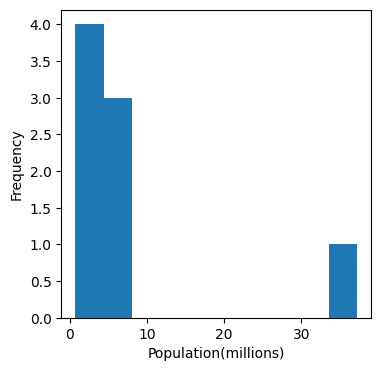

In [11]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population(millions)')

- Empty bins are included in graph.
- Bins are of equal width.
- The number if bins(or, equivalent, bin size) is up to user.
- Bars are continuous no empty space shows between bars, unless there is empty bin.

### Statistical 
- in statistical theory, LOCATION AND VARIABILITY are refered to as the first and second moments of distibution.
- The third and fourth moments are called SKEWNESS AND KURTOSIS.
- Skewness refers to whether data is skewed to larger or smaller values.
- Kurtosis indicates the propensity of the data to have extreme values.


### Density plots and Estimate
- Related to histogram is a density plot, which shows the distribution of data values as continuous line.
- plot function often take optional axis(ax) argument, which will cause the plot to be added to same graph.
- **Density Estimation** is a rich topic with a long history in statisticalm literature.

Text(0.5, 0, 'Murder rate (per 100,000)')

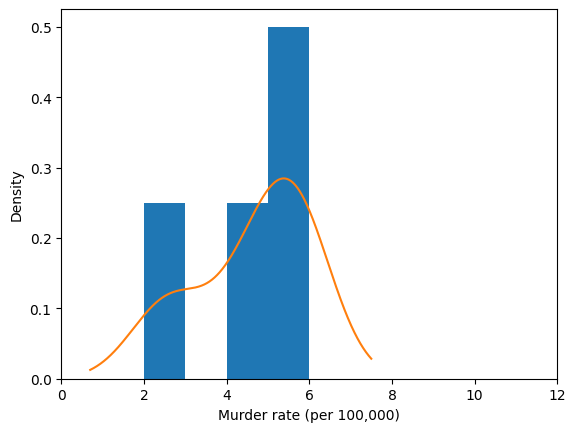

In [14]:
ax = state['Murder rate'].plot.hist(density = True, xlim=[0,12], bins=range(1,12))
state['Murder rate'].plot.density(ax=ax)
ax.set_xlabel('Murder rate (per 100,000)')

### Key Ideas
- A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis; it gives a sense of distribution of the data at a glance.
- A frequency table is a tabular version of the frequency counts found in a histogram.
- A boxplot- with the top and bottom of the box at 75th and 25th percentiles, respectively-also gives a quick sense of distribution of the data; it is often used in side-by-side display to compare distributions.
- A density plot is a smoothed version of a histogram; it requires a function to estimate a plot based on data(multiple estimates are possible, of course).

## Exploring Binary and Categorical Data
- For categorical data, simpleproportions or percentages tell the story of the data.
- **Mode:** most commonly occuring category or value in a data set.
- **Expected value:** when the categorical can be associated with a numberic value, this gives average value based on a category's probability of occurence.
- **Bar charts:** frequency or proportion for each category plotted as bars.
- **Pie charts:** frequency or proportion for each category plotted as wedges in a pie.
- Statisticians and data visualization experts generally eschew(parhez karna) pie charts as less visually informative.

In [16]:
state

,Sr.,State,Population,Murder rate,Abbreviation
0,1,Alabama,4779736,5.7,AL
1,2,Alaska,710231,5.6,AK
2,3,Arizona,6392017,4.7,AZ
3,4,Arkansas,2915918,5.6,AR
4,5,California,37253956,4.4,CA
5,6,Colorado,5029196,2.8,co
6,7,Connecticut,3574097,2.4,CT
7,8,Delaware,897934,5.8,DE


In [21]:
df = pd.read_csv("employee_performance_data.csv")
df.head()

,Employee_ID,Name,Department,Gender,Age,Education_Level,Experience_Years,Job_Role,Performance_Rating,Status
0,E001,Alice,Engineering,Female,29,Bachelor,5,Software Engineer,Excellent,Active
1,E002,Bob,Marketing,Male,35,Master,10,Digital Marketer,Good,Active
2,E003,Charlie,HR,Male,41,Bachelor,15,HR Manager,Average,On Leave
3,E004,Diana,Engineering,Female,26,Master,3,Data Scientist,Excellent,Active
4,E005,Evan,Sales,Male,38,Bachelor,12,Sales Executive,Poor,Resigned


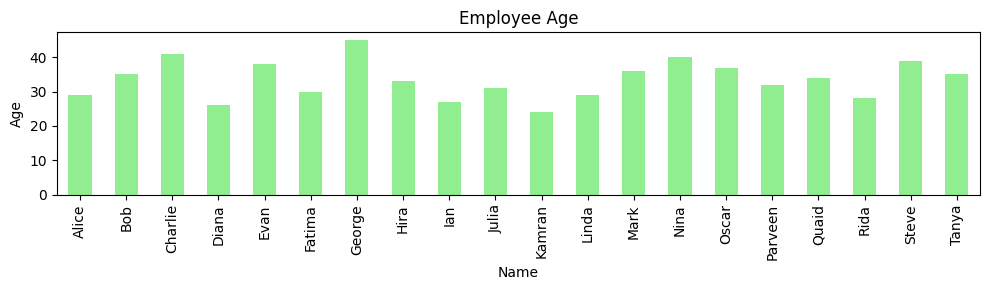

In [30]:
import matplotlib.pyplot as plt

# Set Name as index for plotting
df_plot = df.set_index("Name")

# Plot bar chart of Age
ax = df_plot["Age"].plot.bar(figsize=(10, 3), legend=False, color='lightgreen')
ax.set_xlabel("Name")
ax.set_ylabel("Age")
ax.set_title("Employee Age")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



- Converting numeric data to categorical data is an important and widely used step in data analysis sinceit reduces the complexity(and size) of the data. This aids in the discovery of relationships between features, particularly at the initial stages of an analysis.
- The mode is a simple summary statistic for categorical data, and it is generally not used for numeric data.
- The expected value is calculated as follows:
- 1. Multiply each outcome by its probability of occurence.
- 2. Sum these values.
- The Expected value is really a form of weighted mean: it adds ideas of future expectations and probability weights, often based in subjective judgment.
- Expected value is a fundamental concept in business valuation and capital budgeting-for example, the expected value of five years of profits from a new acquisition, or the expected cost savings from new patient management software at a clinic.

### Probability
- Categorical data is typically summed up in  proportions and can be visualized in a bar chart.
- Categories might represent distinct things(apples and mangoes, male and female), levels of a factor variable(low, medium and high), or numeric data that has been binned.
- Expected valu is the sum of values times their probablity of occurence, often used to sum up factor variable levels.
  

### Correlation
- correleation coefficient: a metrix that measures the extend to which numeric variables are associated with one another (ranges from -1 to +1)
- correlation matrix: a table where the variables are shown on both rows and columns, and the cell values are the correlation between the variables.
- scatterplot: a plot in which th x-axis is the values one variable, and the y-axis the value of another.
- Other types of correlation coefficient :  1. spearman's rho or kendall's tau ( these are correlation coefficients based on the rank of the data. since they work with ranks rather than values, these estimates robust to outliers and can handle certain types of nonlinearities)

In [ ]:
# etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
# sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap = sns.diverging_palette(20, 220, as_cmap=True))

### scatter plot
- The standard way to visualize the relationship beteen two measured data variables is with a scatterplot.

### Exploring two or more variables
- contingency table: a tally of counts between two or more categorical variable
- hexagonal binning: a plot of two numeric variables with the records binned into hexagons.
- counter plot : a plot showing the density of two variables like a topographical map.
- violin plot: similar to a boxplot but showing the density estimate.

In [ ]:
# 59
